<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/cnnimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Small Image Classification Using Convolutional Neural Network (CNN)**
# **In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification:**

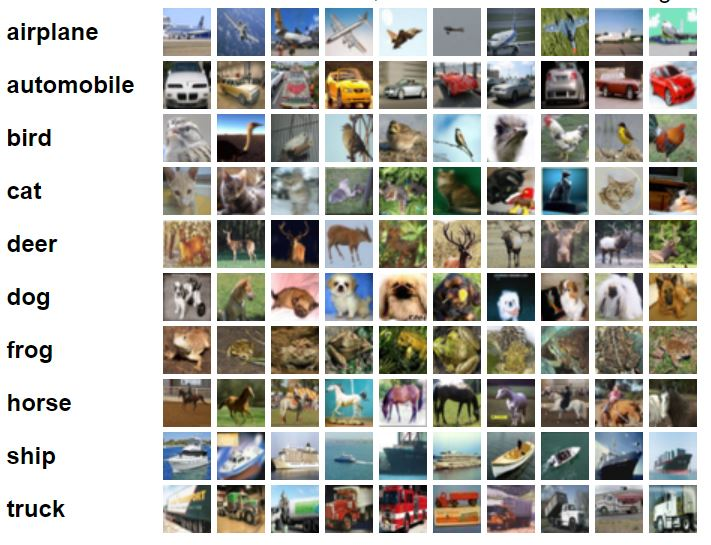

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

 Here we see there are 50000 training images and 1000 test images
bold text

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

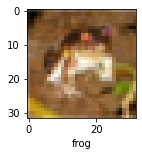

In [10]:
plot_sample(X_train, y_train, 0)

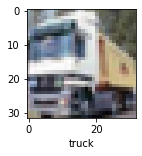

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255.
# Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.8129 - accuracy: 0.3531
Epoch 2/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.6232 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5413 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4831 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4315 - accuracy: 0.4967


# You can see that at the end of 5 epochs, accuracy is at around 49%

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.48      0.52      1000
           1       0.71      0.43      0.53      1000
           2       0.39      0.35      0.37      1000
           3       0.30      0.52      0.38      1000
           4       0.46      0.39      0.42      1000
           5       0.49      0.21      0.30      1000
           6       0.45      0.68      0.54      1000
           7       0.72      0.37      0.49      1000
           8       0.44      0.76      0.55      1000
           9       0.58      0.50      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



Now let us build a convolutional neural network to train our images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.4993 - accuracy: 0.4604
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1393 - accuracy: 0.5982
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0075 - accuracy: 0.6485
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9127 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8487 - accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7922 - accuracy: 0.7233
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7482 - accuracy: 0.7394
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7007 - accuracy: 0.7586
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6688 - accuracy: 0.7662
Epoch 10/10
1563/1563 [==============================] - 56s 36m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9242 - accuracy: 0.6985


[0.9242066144943237, 0.6984999775886536]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.8125986e-03, 1.4808739e-05, 1.6762787e-02, 8.7925887e-01,
        8.5780825e-03, 6.6046908e-02, 4.7823191e-03, 8.8822953e-03,
        8.2768500e-03, 5.8444217e-04],
       [3.8313694e-04, 8.8706031e-04, 1.2717613e-06, 6.7987361e-07,
        5.3702473e-07, 4.4025331e-08, 3.4836543e-08, 3.9670688e-08,
        9.9859601e-01, 1.3115346e-04],
       [3.9960075e-02, 3.7614219e-02, 3.7371160e-03, 3.3343686e-03,
        8.1920938e-04, 2.4036388e-04, 3.4042555e-04, 3.6773426e-04,
        9.0225649e-01, 1.1329973e-02],
       [8.4709036e-01, 1.9756367e-02, 6.1374199e-02, 8.7690698e-03,
        1.8634299e-02, 1.6879941e-03, 6.1219401e-04, 2.8581312e-03,
        3.8468271e-02, 7.4901432e-04],
       [5.0501319e-07, 2.9529054e-05, 7.3595345e-02, 9.9702351e-02,
        3.6788884e-01, 1.4585357e-03, 4.5731267e-01, 1.1397809e-06,
        1.0955717e-05, 7.0746957e-08]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

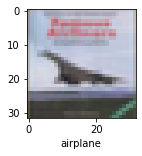

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
classes[y_classes[3]]

'airplane'